In [1]:
import os
os.getcwd()

'C:\\Users\\priya'

In [2]:
import pandas as pd
data = pd.read_csv("aapl.txt")

In [3]:
data.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,0
1,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,0
2,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0
3,1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,0
4,1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,0


In [4]:
print("checking if any null values are present\n", data.isna().sum())

checking if any null values are present
 Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
dtype: int64


In [5]:
data['Date'] = pd.to_datetime(data['Date'])



In [6]:
# Get month of each sample
data['month'] = data['Date'].dt.month

# Sort by datetime
data.sort_values(by='Date', inplace=True, ascending=True)

data.head(10)

,Date,Open,High,Low,Close,Volume,OpenInt,month
0,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,0,9
1,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,0,9
2,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0,9
3,1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,0,9
4,1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,0,9
5,1984-09-14,0.44052,0.45589,0.44052,0.44566,68847968,0,9
6,1984-09-17,0.45718,0.46357,0.45718,0.45718,53755262,0,9
7,1984-09-18,0.45718,0.46103,0.44052,0.44052,27136886,0,9
8,1984-09-19,0.44052,0.44566,0.43157,0.43157,29641922,0,9
9,1984-09-20,0.43286,0.43668,0.43286,0.43286,18453585,0,9


In [7]:
data = data.loc[data['Date'] >= '2013-01-01']

In [8]:
data.head()

,Date,Open,High,Low,Close,Volume,OpenInt,month
7138,2013-01-02,71.553,71.705,69.978,70.935,154865509,0,1
7139,2013-01-03,70.745,71.017,69.896,70.039,97488400,0,1
7140,2013-01-04,69.375,69.591,67.936,68.088,164191192,0,1
7141,2013-01-07,67.446,68.386,66.566,67.689,133721724,0,1
7142,2013-01-08,68.375,68.721,67.346,67.871,126651168,0,1


In [9]:
data.dtypes

Date       datetime64[ns]
Open              float64
High              float64
Low               float64
Close             float64
Volume              int64
OpenInt             int64
month               int64
dtype: object

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1226 entries, 7138 to 8363
Data columns (total 8 columns):
Date       1226 non-null datetime64[ns]
Open       1226 non-null float64
High       1226 non-null float64
Low        1226 non-null float64
Close      1226 non-null float64
Volume     1226 non-null int64
OpenInt    1226 non-null int64
month      1226 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(3)
memory usage: 86.2 KB


In [11]:
#to plot within notebook
import numpy as np
import matplotlib.pyplot as plt




Text(0, 0.5, 'USD')

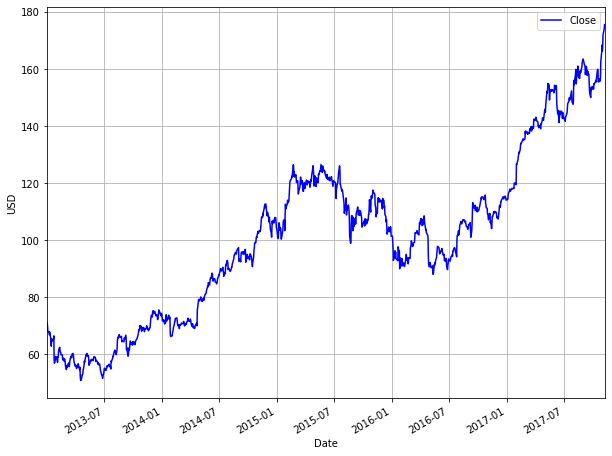

In [12]:
# Plot adjusted close over time
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8 # width 10, height 8

ax = data.plot(x='Date', y='Close', style='b-', grid=True)
ax.set_xlabel("Date")
ax.set_ylabel("USD")

In [13]:
## split the dataset into training and test sets

In [14]:
# Get sizes of each of the datasets
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np

num_train = int(0.70*len(data))
num_test = int(0.30*len(data))
#num_cv = len(data) - num_cv - num_test
print("num_train = " + str(num_train))
#print("num_cv = " + str(num_cv))
print("num_test = " + str(num_test))

# Split into train, cv, and test
train = data[:num_train]
#cv = data[num_train:num_train+num_cv]
#train_cv = data[:num_train+num_cv]
test = data[num_train:]
print("train.shape = " + str(train.shape))
#print("cv.shape = " + str(cv.shape))
#print("train_cv.shape = " + str(train_cv.shape))
print("test.shape = " + str(test.shape))

num_train = 858
num_test = 367
train.shape = (858, 8)
test.shape = (368, 8)


Text(0, 0.5, 'USD')

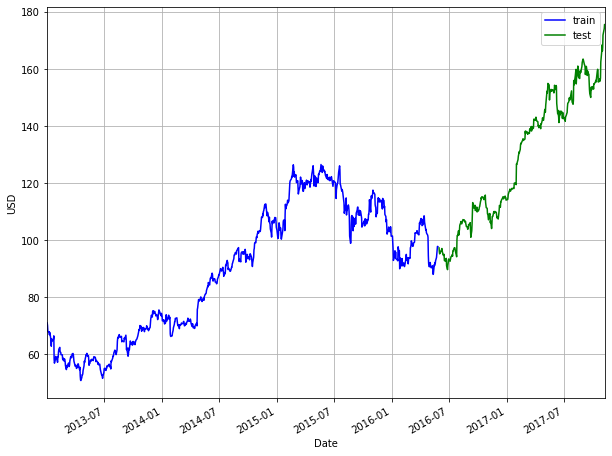

In [15]:
# Plot Close Price over time
plt.rcParams['figure.figsize'] = 10, 8 # width 10, height 8

ax = train.plot(x='Date', y='Close', style='b-', grid=True)
#ax = cv.plot(x='Date', y='Close', style='y-', grid=True, ax=ax)
ax = test.plot(x='Date', y='Close', style='g-', grid=True, ax=ax)
ax.legend(['train', 'test'])
ax.set_xlabel("Date")
ax.set_ylabel("USD")

In [16]:

#importing libraries
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [17]:
train.head()

,Date,Open,High,Low,Close,Volume,OpenInt,month
7138,2013-01-02,71.553,71.705,69.978,70.935,154865509,0,1
7139,2013-01-03,70.745,71.017,69.896,70.039,97488400,0,1
7140,2013-01-04,69.375,69.591,67.936,68.088,164191192,0,1
7141,2013-01-07,67.446,68.386,66.566,67.689,133721724,0,1
7142,2013-01-08,68.375,68.721,67.346,67.871,126651168,0,1


In [18]:
train['date_ordinal'] = train['Date'].apply(lambda date: date.toordinal())

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
train.head()

,Date,Open,High,Low,Close,Volume,OpenInt,month,date_ordinal
7138,2013-01-02,71.553,71.705,69.978,70.935,154865509,0,1,734870
7139,2013-01-03,70.745,71.017,69.896,70.039,97488400,0,1,734871
7140,2013-01-04,69.375,69.591,67.936,68.088,164191192,0,1,734872
7141,2013-01-07,67.446,68.386,66.566,67.689,133721724,0,1,734875
7142,2013-01-08,68.375,68.721,67.346,67.871,126651168,0,1,734876


In [20]:
train = train [['Open','High','Low','Close','Volume','OpenInt','date_ordinal']]

In [21]:
train.head()

,Open,High,Low,Close,Volume,OpenInt,date_ordinal
7138,71.553,71.705,69.978,70.935,154865509,0,734870
7139,70.745,71.017,69.896,70.039,97488400,0,734871
7140,69.375,69.591,67.936,68.088,164191192,0,734872
7141,67.446,68.386,66.566,67.689,133721724,0,734875
7142,68.375,68.721,67.346,67.871,126651168,0,734876


In [22]:
train.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
OpenInt           int64
date_ordinal      int64
dtype: object

In [23]:
test.head()

,Date,Open,High,Low,Close,Volume,OpenInt,month
7996,2016-05-31,96.998,97.778,96.239,97.251,40046258,0,5
7997,2016-06-01,96.432,96.940,95.761,95.886,28795510,0,6
7998,2016-06-02,95.049,95.283,94.105,95.167,39671824,0,6
7999,2016-06-03,95.235,95.703,94.904,95.361,26032342,0,6
8000,2016-06-06,95.429,99.223,95.000,96.054,23399089,0,6


In [24]:
test['date_ordinal'] = test['Date'].apply(lambda date: date.toordinal())

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [25]:
test = test[['Open','High','Low','Close','Volume','OpenInt','date_ordinal']]

In [26]:
test.head()

,Open,High,Low,Close,Volume,OpenInt,date_ordinal
7996,96.998,97.778,96.239,97.251,40046258,0,736115
7997,96.432,96.940,95.761,95.886,28795510,0,736116
7998,95.049,95.283,94.105,95.167,39671824,0,736117
7999,95.235,95.703,94.904,95.361,26032342,0,736118
8000,95.429,99.223,95.000,96.054,23399089,0,736121


In [27]:
x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_valid = test.drop('Close', axis=1)
y_valid = test['Close']

In [28]:
x_train.head()

,Open,High,Low,Volume,OpenInt,date_ordinal
7138,71.553,71.705,69.978,154865509,0,734870
7139,70.745,71.017,69.896,97488400,0,734871
7140,69.375,69.591,67.936,164191192,0,734872
7141,67.446,68.386,66.566,133721724,0,734875
7142,68.375,68.721,67.346,126651168,0,734876


In [29]:
y_train.head()

7138    70.935
7139    70.039
7140    68.088
7141    67.689
7142    67.871
Name: Close, dtype: float64

In [30]:
x_train.dtypes

Open            float64
High            float64
Low             float64
Volume            int64
OpenInt           int64
date_ordinal      int64
dtype: object

In [31]:
x_valid.head()

,Open,High,Low,Volume,OpenInt,date_ordinal
7996,96.998,97.778,96.239,40046258,0,736115
7997,96.432,96.940,95.761,28795510,0,736116
7998,95.049,95.283,94.105,39671824,0,736117
7999,95.235,95.703,94.904,26032342,0,736118
8000,95.429,99.223,95.000,23399089,0,736121


In [32]:
y_valid.head()

7996    97.251
7997    95.886
7998    95.167
7999    95.361
8000    96.054
Name: Close, dtype: float64

In [33]:
# create linear regerssion model
#implement linear regression
# fit a model
from sklearn.linear_model import LinearRegression
lm = linear_model.LinearRegression()
model = lm.fit(x_train, y_train)
predictions = lm.predict(x_valid)

In [34]:
predictions[0:5]

array([97.10914132, 96.40017965, 94.57112479, 95.45537712, 98.22819778])

Text(0, 0.5, 'Predictions')

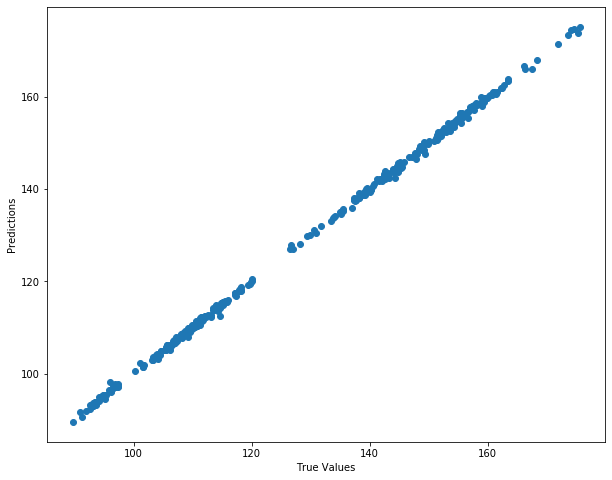

In [35]:
## The line / model
plt.scatter(y_valid, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [36]:
model.score(x_valid, y_valid)

0.9995139287882314

In [37]:
# find RMSE
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(predictions)),2)))

In [38]:
rms

0.506031783020486

In [39]:
### k-nearest neighbor model using the same training and test data ####

In [40]:
#scaling data
x_train_scaled = scaler.fit_transform(train)
x_train = pd.DataFrame(x_train_scaled)
x_valid_scaled = scaler.fit_transform(test)
x_valid = pd.DataFrame(x_valid_scaled)

#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions
model.fit(x_train,y_train)
preds = model.predict(x_valid)

In [41]:
#rmse
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

43.49426035719686

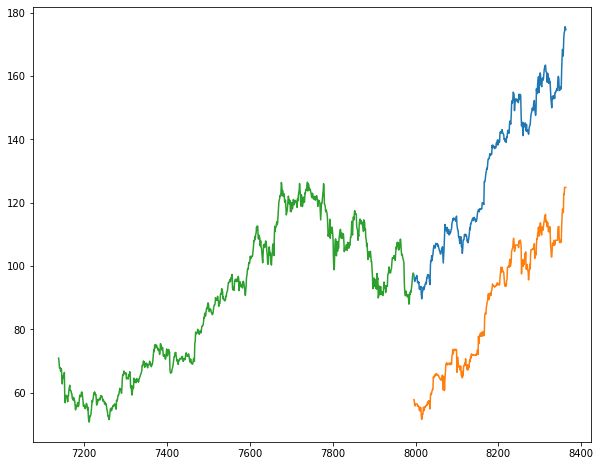

In [42]:
#plot
test['Predictions'] = 0
test['Predictions'] = preds
plt.plot(test[['Close', 'Predictions']])
plt.plot(train['Close'])

In [43]:
#### creation of Auto ARIMA Model ######

In [44]:
training = train['Close']

In [45]:
training.head()

7138    70.935
7139    70.039
7140    68.088
7141    67.689
7142    67.871
Name: Close, dtype: float64

In [46]:
validation = test['Close']

In [47]:
validation.head()

7996    97.251
7997    95.886
7998    95.167
7999    95.361
8000    96.054
Name: Close, dtype: float64

In [48]:
#!pip install pyramid-arima
#!pip install pmdarima --user 
#conda install -c priya pmdarima
#!conda install -c anaconda pyramid
#conda install -c conda-forge pyramid
#!conda install -c conda-forge/label/cf201901 pyramid
#!pip install pmdarima --user

In [49]:
#!pip list | findstr pmdarima

In [50]:
#from pmdarima.arima import auto_arima
#model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
#model.fit(training)

#forecast = model.predict(n_periods=368)
#forecast = pd.DataFrame(forecast,index = validation.index,columns=['Prediction'])


In [51]:

print(model.aic())

AttributeError: 'GridSearchCV' object has no attribute 'aic'

In [ ]:
rms=np.sqrt(np.mean(np.power((np.array(validation)-np.array(forecast['Prediction'])),2)))
rms

In [ ]:
#plot
plt.plot(train['Close'])
plt.plot(test['Close'])
plt.plot(forecast['Prediction'])


In [ ]:
#### implement Prophet
#importing prophet
#!pip install ephem --user
#!pip install pystan --user
#!pip install fbprophet --user



In [ ]:
#conda install libpython m2w64-toolchain -c msys2

In [ ]:
#!pip install fbprophet --user

In [ ]:
#!pip search fbprophet

In [ ]:
conda list

In [ ]:
from fbprophet import Prophet

In [ ]:
import sys
print(sys.executable)

In [ ]:
data.head()

In [ ]:
num_train = int(0.70*len(data))
num_test = int(0.30*len(data))
#num_cv = len(data) - num_cv - num_test
print("num_train = " + str(num_train))
#print("num_cv = " + str(num_cv))
print("num_test = " + str(num_test))

# Split into train, cv, and test
train1 = data[:num_train]
#cv = data[num_train:num_train+num_cv]
#train_cv = data[:num_train+num_cv]
test1 = data[num_train:]
print("train.shape = " + str(train1.shape))
#print("cv.shape = " + str(cv.shape))
#print("train_cv.shape = " + str(train_cv.shape))
print("test.shape = " + str(test1.shape))

In [ ]:
new_data = train1[['Date', 'Close']]

In [ ]:
new_data.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True)

In [ ]:
new_data.head()

In [ ]:
new_data1 = test1[['Date', 'Close']]

In [ ]:
new_data1.head()

In [ ]:
new_data1.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True)

In [ ]:
new_data1.head()

In [ ]:
#fit the model
model = Prophet()
a = model.fit(new_data)
a

#predictions
close_prices = a.make_future_dataframe(periods=len(new_data1))
forecast = a.predict(close_prices)

In [ ]:
close_prices.head()

In [ ]:
forecast.head()

In [ ]:

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [ ]:
# plot the fig in Prophet
fig1 = a.plot(forecast)


In [ ]:
#rmse
forecast_valid = forecast['yhat'][:368]


In [ ]:
forecast_valid.head()

In [ ]:
len(forecast_valid)

In [ ]:
len(new_data1['y'])

In [ ]:
rms=np.sqrt(np.mean(np.power((np.array(new_data1['y'])-np.array(forecast_valid)),2)))
rms

In [ ]:
##### LTSM ######

In [52]:
data.head()

,Date,Open,High,Low,Close,Volume,OpenInt,month
7138,2013-01-02,71.553,71.705,69.978,70.935,154865509,0,1
7139,2013-01-03,70.745,71.017,69.896,70.039,97488400,0,1
7140,2013-01-04,69.375,69.591,67.936,68.088,164191192,0,1
7141,2013-01-07,67.446,68.386,66.566,67.689,133721724,0,1
7142,2013-01-08,68.375,68.721,67.346,67.871,126651168,0,1


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1226 entries, 7138 to 8363
Data columns (total 8 columns):
Date       1226 non-null datetime64[ns]
Open       1226 non-null float64
High       1226 non-null float64
Low        1226 non-null float64
Close      1226 non-null float64
Volume     1226 non-null int64
OpenInt    1226 non-null int64
month      1226 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(3)
memory usage: 86.2 KB


In [ ]:
#!pip install Keras

In [ ]:
#conda install tensorflow

In [54]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM





Using TensorFlow backend.


In [55]:
#creating dataframe
data = data.sort_index(ascending=True, axis=0)
data.head()



,Date,Open,High,Low,Close,Volume,OpenInt,month
7138,2013-01-02,71.553,71.705,69.978,70.935,154865509,0,1
7139,2013-01-03,70.745,71.017,69.896,70.039,97488400,0,1
7140,2013-01-04,69.375,69.591,67.936,68.088,164191192,0,1
7141,2013-01-07,67.446,68.386,66.566,67.689,133721724,0,1
7142,2013-01-08,68.375,68.721,67.346,67.871,126651168,0,1


In [56]:
new_data = pd.DataFrame(data[['Date', 'Close']])

In [57]:
new_data.head()

,Date,Close
7138,2013-01-02,70.935
7139,2013-01-03,70.039
7140,2013-01-04,68.088
7141,2013-01-07,67.689
7142,2013-01-08,67.871


In [58]:
#for i in range(0,len(new_data)):
    #new_data['Date'][i] = data['Date'][i]
    #new_data['Close'][i] = data['Close'][i]

In [59]:
#setting index
new_data.index = new_data['Date']
new_data.drop('Date', axis=1, inplace=True)

In [60]:
new_data.head()

,Close
Date,
2013-01-02,70.935
2013-01-03,70.039
2013-01-04,68.088
2013-01-07,67.689
2013-01-08,67.871


In [105]:
train2 = new_data.loc[:'2016-12-31']

In [106]:
test2 = new_data.loc['2017-01-01':]

In [107]:
train2.head()

,Close
Date,
2013-01-02,70.935
2013-01-03,70.039
2013-01-04,68.088
2013-01-07,67.689
2013-01-08,67.871


In [108]:
test2.head()

,Close
Date,
2017-01-03,114.31
2017-01-04,114.19
2017-01-05,114.77
2017-01-06,116.04
2017-01-09,117.11


In [109]:
train2 = train2.values

In [110]:
train2 = pd.DataFrame(train2)

In [111]:
train2.head()

,0
0,70.935
1,70.039
2,68.088
3,67.689
4,67.871


In [112]:
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(new_data)


In [113]:
scaled_data

array([[0.16166777],
       [0.15449179],
       [0.13886642],
       ...,
       [1.        ],
       [0.99711679],
       [0.99247163]])

In [114]:
train2.head()

,0
0,70.935
1,70.039
2,68.088
3,67.689
4,67.871


In [120]:
test2 = test2.values

In [122]:
test2=pd.DataFrame(test2)

In [123]:
x_train, y_train = [], []
for i in range(60,len(train2)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)


In [124]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [125]:
x_train

array([[[0.16166777],
        [0.15449179],
        [0.13886642],
        ...,
        [0.07349773],
        [0.06407926],
        [0.05425233]],

       [[0.15449179],
        [0.13886642],
        [0.13567087],
        ...,
        [0.06407926],
        [0.05425233],
        [0.03997245]],

       [[0.13886642],
        [0.13567087],
        [0.13712849],
        ...,
        [0.05425233],
        [0.03997245],
        [0.04086945]],

       ...,

       [[0.47597729],
        [0.47958129],
        [0.47998174],
        ...,
        [0.51017531],
        [0.51201736],
        [0.51786386]],

       [[0.47958129],
        [0.47998174],
        [0.48670922],
        ...,
        [0.51201736],
        [0.51786386],
        [0.5139395 ]],

       [[0.47998174],
        [0.48670922],
        [0.48807073],
        ...,
        [0.51786386],
        [0.5139395 ],
        [0.51369923]]])

In [126]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

In [127]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

Epoch 1/1
 - 43s - loss: 0.0015


In [128]:
#predicting  values, using past 60 from the train data
inputs = new_data[len(new_data) - len(test2) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [137]:
len(inputs)

278

In [130]:
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

In [131]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [138]:
len(X_test)

218

In [133]:
closing_price = model.predict(X_test)

In [134]:
closing_price = scaler.inverse_transform(closing_price)

In [139]:
len(closing_price)

218

In [140]:
len(test2)

218

In [141]:
rms=np.sqrt(np.mean(np.power((test2-closing_price),2)))
rms

0    11.090009
dtype: float64

In [ ]:
##### Thank You #####